<a href="https://colab.research.google.com/github/RutbaJaveed/ML-Projects/blob/main/digitrecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python

In [ ]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

loss, accuracy = model.evaluate(x_test, y_test)
print(accuracy)
print(loss)

model.save('digits.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8719 - loss: 0.4513
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9642 - loss: 0.1141
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9774 - loss: 0.0737
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9661 - loss: 0.1111
0.970300018787384
0.10062658786773682


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Result for 1.png: 2


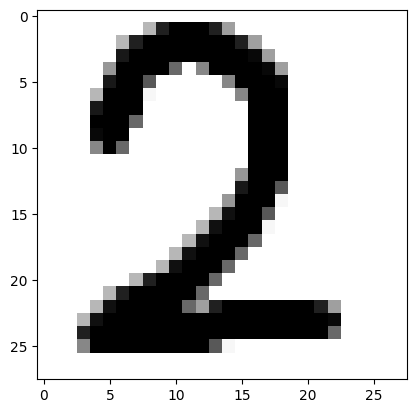

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Result for 2.png: 3


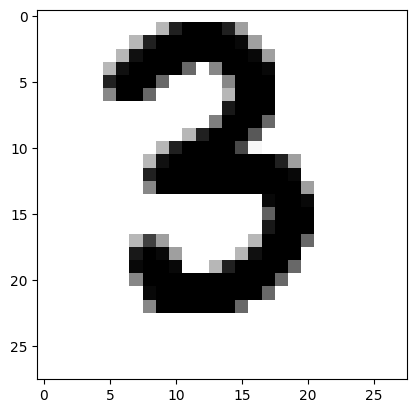

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Result for 3.png: 2


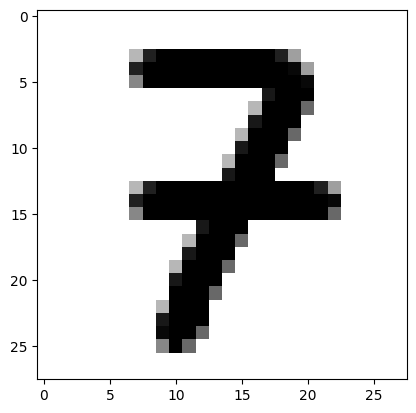

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Result for 4.png: 8


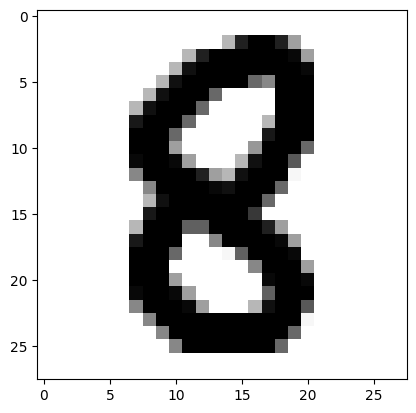

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Result for 5.png: 5


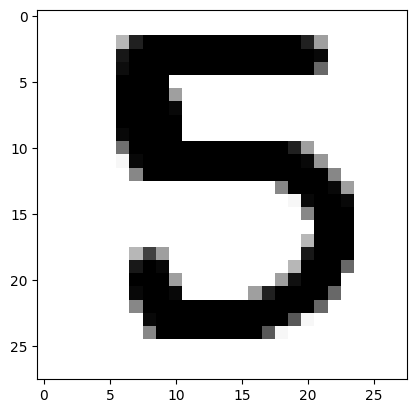

In [ ]:

image_folder = '/content/drive/MyDrive/digit recognition project'
for x in range(1,6):
  image_path = os.path.join(image_folder, f'{x}.png')
  img = cv2.imread(image_path)[:,:,0]
  img = np.invert(np.array(img))
  img = img.reshape(1, 28, 28)
  prediction = model.predict(img)
  print(f"Result for {x}.png: {np.argmax(prediction)}")
  plt.imshow(img[0], cmap=plt.cm.binary)  # squeeze to remove channel dimension for display
  plt.show()